# Laboratorio 11

Juan Camilo Gallego 
CC: 1000098978

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Tarea 11.1 
1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search. 
2. Con los mejores párametros dibujar  las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion 

Mejores parámetros para Moons: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.9591836734693878


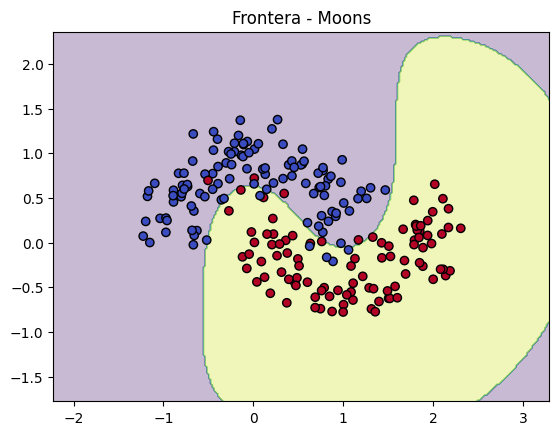

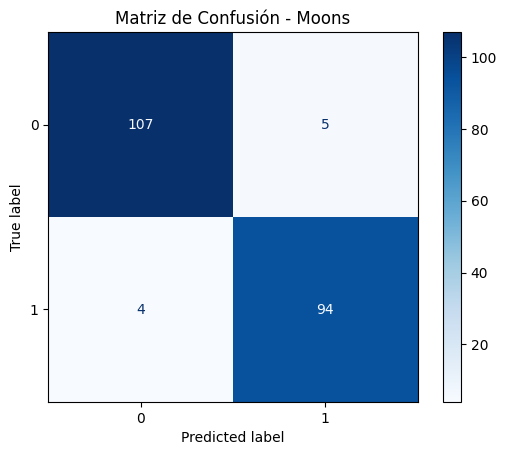

Mejores parámetros para Circles: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.9918367346938775


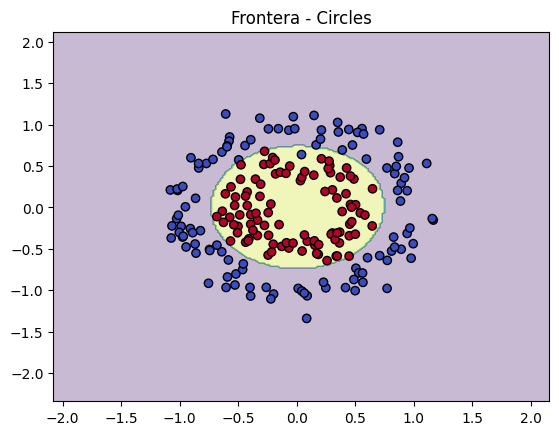

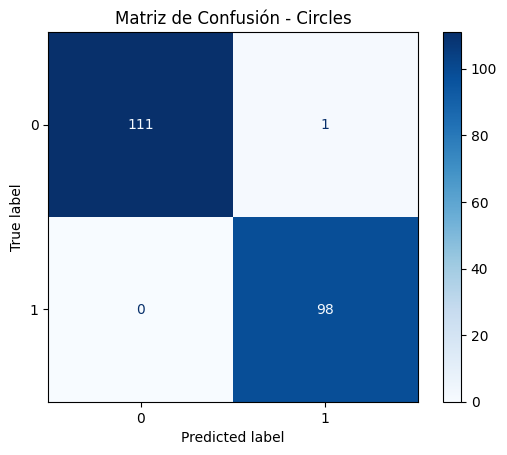

Mejores parámetros para Blobs: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
best score: 1.0


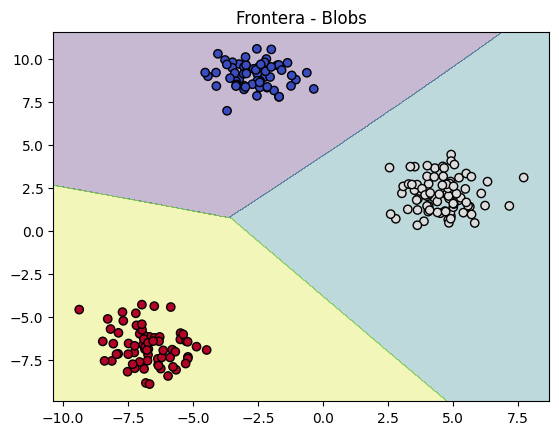

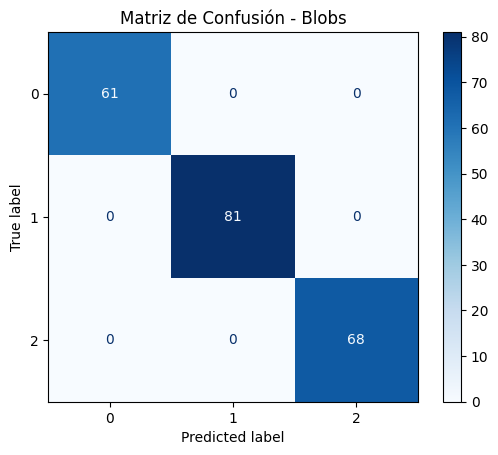

In [10]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()


def train_svm_with_grid(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param_grid = {
        "C": [0.1, 1, 10, 100],
        "gamma": [0.01, 0.1, 1],
        "kernel": ["rbf", "poly", "sigmoid","linear"]
    }

    grid = GridSearchCV(SVC(), param_grid, cv=5)
    grid.fit(X_train, y_train)

    print(f"Mejores parámetros para {dataset_name}: {grid.best_params_}")
    print(f'best score: {grid.best_score_}')

    best_model = grid.best_estimator_

    # Frontera de decisión
    plot_decision_boundary(best_model, X_test, y_test, f"Frontera - {dataset_name}")

    # Matriz de confusión
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {dataset_name}")
    plt.show()



# 1. make_moons
X, y = make_moons(n_samples=700, noise=0.2, random_state=42)
train_svm_with_grid(X, y, "Moons")

# 2. make_circles
X, y = make_circles(n_samples=700, noise=0.1, factor=0.5, random_state=42)
train_svm_with_grid(X, y, "Circles")

# 3. make_blobs
X, y = make_blobs(n_samples=700, centers=3, cluster_std=1.0, random_state=42)
train_svm_with_grid(X, y, "Blobs")